<a href="https://colab.research.google.com/github/Trrunghau/Trrunghau/blob/homework/Fuzzy_Transplant_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b5fd5a3d2d4b206d703ccd4be887c2a115f723ca57dbd5764c127e6a0cd0d8fa
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


glycaemia+sirolimus= 276.7161046354626
glycaemia+cyclosporine= 44.22747252747252
glycaemia+DiffACE= 325.0211649890279
glycaemia+DiffACE=GFRLEVEL= 44.160440613026815


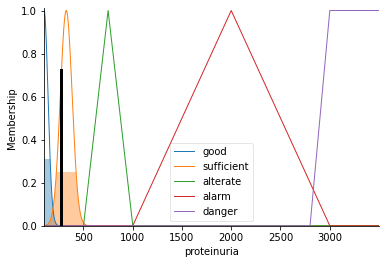

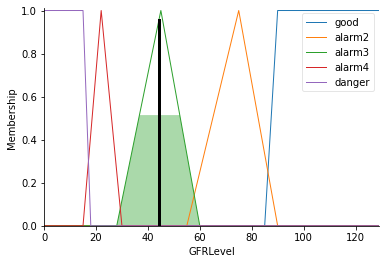

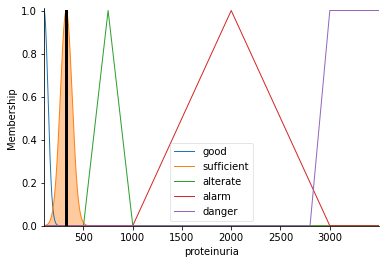

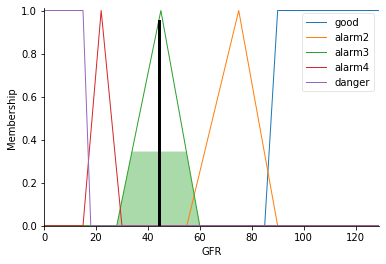

In [29]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as crtl 

glycaemia = crtl.Antecedent(np.arange(50,150,1),'glycaemia')          # input1
sirolimus = crtl.Antecedent(np.arange(0,20,0.5),'sirolimus')            # input1
proteinuria = crtl.Consequent(np.arange(100,3500,1),'proteinuria')    # output1    

glycaemia['good'] = fuzz.trimf(glycaemia.universe,[70,70,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[85,105,125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe,[115,125,160])

sirolimus['alarm down'] = fuzz.trimf(sirolimus.universe,[0,0,5])
sirolimus['sufficient'] = fuzz.trimf(sirolimus.universe,[4,5.5,7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe,[6,9,12])
sirolimus['alarm up'] = fuzz.trimf(sirolimus.universe,[11,12.5,14])
sirolimus['danger'] = fuzz.trimf(sirolimus.universe,[13,20,20])

proteinuria['good'] = fuzz.gaussmf(proteinuria.universe,100,40)
proteinuria['sufficient'] = fuzz.gaussmf(proteinuria.universe,325,60)
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[500,750,1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[1000,2000,3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[2800,3000,3500,3500])

ProtFISrule1 = crtl.Rule(glycaemia['good']&sirolimus['good'],proteinuria['good'])
ProtFISrule2 = crtl.Rule(glycaemia['danger']&sirolimus['danger'],proteinuria['danger'])
ProtFISrule3 = crtl.Rule(glycaemia['good']&sirolimus['sufficient'],proteinuria['sufficient'])
ProtFISrule4 = crtl.Rule(glycaemia['alarm']&sirolimus['alarm up'],proteinuria['alarm'])
ProtFISrule5 = crtl.Rule(glycaemia['alarm']&sirolimus['sufficient'],proteinuria['alterate'])
ProtFISrule6 = crtl.Rule(glycaemia['good']&sirolimus['alarm up'],proteinuria['alterate'])
ProtFISrule7 = crtl.Rule(glycaemia['alarm']&sirolimus['good'],proteinuria['sufficient'])
ProtFISrule8 = crtl.Rule(glycaemia['good']&sirolimus['alarm down'],proteinuria['sufficient'])

ProtFIS_ctrl = crtl.ControlSystem([ProtFISrule1,ProtFISrule2,ProtFISrule3,ProtFISrule4,ProtFISrule5,ProtFISrule6,ProtFISrule7,ProtFISrule8])
ProtFIS = crtl.ControlSystemSimulation(ProtFIS_ctrl)
ProtFIS.input['glycaemia'] = 90
ProtFIS.input['sirolimus'] = 7.82
ProtFIS.compute()
print('glycaemia+sirolimus=',ProtFIS.output['proteinuria'])
proteinuria.view(sim=ProtFIS)


cyclosporine = crtl.Antecedent(np.arange(0,20,0.5),'cyclosporine')          # input2
GFRLevel = crtl.Consequent(np.arange(0,130,1),'GFRLevel')                   # output2    

cyclosporine['alarm down'] = fuzz.trimf(cyclosporine.universe,[0,1,2])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe,[1.5,3.5,5])
cyclosporine['suff'] = fuzz.trimf(cyclosporine.universe,[4,7.5,11])
cyclosporine['alarm up'] = fuzz.trimf(cyclosporine.universe,[8,11.5,23])
cyclosporine['danger'] = fuzz.trimf(cyclosporine.universe,[12,16,20])

GFRLevel['good'] = fuzz.trapmf(GFRLevel.universe,[85,90,130,130])
GFRLevel['alarm2'] = fuzz.trimf(GFRLevel.universe,[55,75,90])
GFRLevel['alarm3'] = fuzz.trimf(GFRLevel.universe,[28,45,60])
GFRLevel['alarm4'] = fuzz.trimf(GFRLevel.universe,[15,22,30])
GFRLevel['danger'] = fuzz.trapmf(GFRLevel.universe,[0,0,15,18])

PfrFISrule1 = crtl.Rule(glycaemia['danger']&cyclosporine['danger'],GFRLevel['danger'])
PfrFISrule2 = crtl.Rule(glycaemia['good']&cyclosporine['danger'],GFRLevel['alarm3'])
PfrFISrule3 = crtl.Rule(glycaemia['alarm']&cyclosporine['alarm up'],GFRLevel['alarm4'])
PfrFISrule4 = crtl.Rule(glycaemia['good']&cyclosporine['suff'],GFRLevel['alarm2'])
PfrFISrule5 = crtl.Rule(glycaemia['good']&cyclosporine['good'],GFRLevel['good'])
PfrFISrule6 = crtl.Rule(glycaemia['alarm']&cyclosporine['good'],GFRLevel['alarm2'])
PfrFISrule7 = crtl.Rule(glycaemia['danger']&cyclosporine['good'],GFRLevel['alarm3'])

PfrFIS_ctrl = crtl.ControlSystem([PfrFISrule1,PfrFISrule2,PfrFISrule3,PfrFISrule4,PfrFISrule5,PfrFISrule6,PfrFISrule7])
PfrFIS = crtl.ControlSystemSimulation(PfrFIS_ctrl)
PfrFIS.input['glycaemia'] = 142
PfrFIS.input['cyclosporine'] = 4.12
PfrFIS.compute()
print('glycaemia+cyclosporine=',PfrFIS.output['GFRLevel'])
GFRLevel.view(sim=PfrFIS)


DiffACE = crtl.Antecedent(np.arange(0,10,0.5),'DiffACE')          # input3 
GFR = crtl.Consequent(np.arange(0,130,1),'GFR')                   # OUTPUT4

DiffACE['0'] = fuzz.trimf(DiffACE.universe,[0,1,1.25])
DiffACE['1'] = fuzz.trimf(DiffACE.universe,[1,1.25,2.5])
DiffACE['2'] = fuzz.trimf(DiffACE.universe,[1.25,2.5,3.5])
DiffACE['3'] = fuzz.trimf(DiffACE.universe,[2.5,3.5,5])
DiffACE['4'] = fuzz.trimf(DiffACE.universe,[3.5,5,10])

GFR['good'] = fuzz.trapmf(GFR.universe,[85,90,130,130])
GFR['alarm2'] = fuzz.trimf(GFR.universe,[55,75,90])
GFR['alarm3'] = fuzz.trimf(GFR.universe,[28,45,60])
GFR['alarm4'] = fuzz.trimf(GFR.universe,[15,22,30])
GFR['danger'] = fuzz.trapmf(GFR.universe,[0,0,15,18])

ProtACErule1 = crtl.Rule(DiffACE['2'],proteinuria['sufficient'])
ProtACErule2 = crtl.Rule(glycaemia['good']&DiffACE['1'],proteinuria['sufficient'])
ProtACErule3 = crtl.Rule(glycaemia['alarm']&DiffACE['1'],proteinuria['alterate'])
ProtACErule4 = crtl.Rule(glycaemia['danger']&DiffACE['1'],proteinuria['alarm'])
ProtACErule5 = crtl.Rule(glycaemia['alarm']&DiffACE['3'],proteinuria['alarm'])
ProtACErule6 = crtl.Rule(glycaemia['good']&DiffACE['3'],proteinuria['alterate'])
ProtACErule7 = crtl.Rule(glycaemia['danger']&DiffACE['4'],proteinuria['danger'])
ProtACErule8 = crtl.Rule(glycaemia['good']&DiffACE['0'],proteinuria['good'])

GFRrule1 = crtl.Rule(glycaemia['good']&DiffACE['2'],GFR['alarm3'])
GFRrule2 = crtl.Rule(glycaemia['alarm']&DiffACE['2'],GFR['alarm3'])
GFRrule3 = crtl.Rule(glycaemia['good']&DiffACE['1'],GFR['alarm2'])
GFRrule4 = crtl.Rule(glycaemia['alarm']&DiffACE['1'],GFR['alarm2'])
GFRrule5 = crtl.Rule(glycaemia['good']&DiffACE['3'],GFR['alarm3'])
GFRrule6 = crtl.Rule(glycaemia['danger']&DiffACE['3'],GFR['alarm4'])
GFRrule7 = crtl.Rule(glycaemia['good']&DiffACE['4'],GFR['alarm2'])
GFRrule8 = crtl.Rule(glycaemia['good']&DiffACE['0'],GFR['good'])
GFRrule9 = crtl.Rule(glycaemia['danger']&DiffACE['4'],GFR['danger'])

ProtACE_ctrl = crtl.ControlSystem([ProtACErule1,ProtACErule2,ProtACErule3,ProtACErule4,ProtACErule5,ProtACErule6,ProtACErule7,ProtACErule8])
ProtACE = crtl.ControlSystemSimulation(ProtACE_ctrl)
ProtACE.input['glycaemia'] = 80
ProtACE.input['DiffACE'] = 2.5
ProtACE.compute()
print('glycaemia+DiffACE=',ProtACE.output['proteinuria'])
proteinuria.view(sim=ProtACE)

GFRLevel_ctrl = crtl.ControlSystem([GFRrule1,GFRrule2,GFRrule3,GFRrule4,GFRrule5,GFRrule6,GFRrule7,GFRrule8,GFRrule9])
GFRL = crtl.ControlSystemSimulation(GFRLevel_ctrl)
GFRL.input['glycaemia'] = 89
GFRL.input['DiffACE'] = 2.5
GFRL.compute()
print('glycaemia+DiffACE=GFRLEVEL=',GFRL.output['GFR'])
GFR.view(sim=GFRL)